# MLOps Zoomcamp 2023

This is the homework for `week#01`, `01-intro` module, for the above [course's](https://github.com/DataTalksClub/mlops-zoomcamp) cohort 2023. We're supposed to practice with the `Yellow Taxi Trip Records` of the NYC taxi dataset https://www.nyc.gov's "TLC Trip Record Data" for year `2022`.

The problem statement we're solving is to predict the `Duration of trips`.

Submit the answers to https://forms.gle/uYTnWrcsubi2gdGV7 by 
- 23 May 2023 (Tuesday), 23:00 CEST (Berlin time)
- 24 May 2023 (Wednesday), 05:00 SST (Singapore local time)


Notes for the lessons can be found in []()

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Get the dataset

[the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records" for **2022**.

- 2022-Jan `https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet`
- 2022-Feb `https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet`

In [2]:
# !wget 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet' -P ../data/raw/
# !wget 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet' -P ../data/raw/

## Load the dataset

Q1. How many columns are there for Jan?

A1. 19

In [3]:
df = pd.read_parquet('../data/raw/yellow_tripdata_2022-01.parquet')


In [4]:
print(f"{df.shape = }")
orig_len = len(df)

df.shape = (2463931, 19)


### Other descriptive statistical information

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2463931.0,1.707819,0.502137,1.00,1.00,2.00,2.00,6.00
passenger_count,2392428.0,1.389453,0.982969,0.00,1.00,1.00,1.00,9.00
trip_distance,2463931.0,5.372751,547.871404,0.00,1.04,1.74,3.13,306159.28
RatecodeID,2392428.0,1.415507,5.917573,1.00,1.00,1.00,1.00,99.00
PULocationID,2463931.0,166.076809,65.468057,1.00,132.00,162.00,234.00,265.00
DOLocationID,2463931.0,163.580716,70.790159,1.00,113.00,162.00,236.00,265.00
payment_type,2463931.0,1.194449,0.500178,0.00,1.00,1.00,1.00,5.00
fare_amount,2463931.0,12.946484,255.814887,-480.00,6.50,9.00,14.00,401092.32
extra,2463931.0,1.006710,1.236226,-4.50,0.00,0.50,2.50,33.50
mta_tax,2463931.0,0.491454,0.082916,-0.50,0.50,0.50,0.50,16.59


In [8]:
df[df.columns[df.isnull().any()]].isnull().sum()

passenger_count         71503
RatecodeID              71503
store_and_fwd_flag      71503
congestion_surcharge    71503
airport_fee             71503
dtype: int64

 `passenger_count` is a 
 
 > ... driver-entered value

 I believe all these columns do not have predictive power on the dependent variable.

### Computing duration

Q2. What's the standard deviation of the trips duration in January?

A2. 46.45

In [9]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] # timedelta is in seconds

In [10]:
df.duration.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99])

count                      2463931
mean     0 days 00:14:12.732175129
std      0 days 00:46:26.718308266
min              -3 days +14:37:36
1%                 0 days 00:00:35
5%                 0 days 00:02:57
10%                0 days 00:04:01
25%                0 days 00:06:19
50%                0 days 00:10:11
75%                0 days 00:16:10
95%                0 days 00:31:56
99%                0 days 00:50:51
max                5 days 21:53:11
Name: duration, dtype: object

Insights:

- min value is -3.44. How can there be a negative duration? The dropoff datetime occuring earlier than pickup datetime might be a data-entry error where the pickup and dropoff dates are swapped; or there's something wrong with the service recording the data if it is automated
- it may also be daylight savings switcheroo shenanigans, to investigate (TODO)
- max value of duration is so much higher than the 99th percentile
- adjusting percentile values, max is still considerably more than 2 standard deviations away from the 99th percentile
- following video tutorial, where it is expected to handle outliers by capping the duration to between 1 and 60 minutes, shows that this is within the 1st and 99th percentile which seems reasonable 

In [11]:
# df['duration'].dt.components.minutes

### Extra analysis

Before we treat the outliers, let's perform some extra EDA on `duration`.

Checking the record with min duration

In [12]:
shortest_trip = df[df['duration']==df['duration'].min()]
shortest_trip


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
1809900,1,2022-01-24 15:23:01,2022-01-22 06:00:37,1.0,4.7,1.0,N,140,152,4,17.0,3.0,0.5,0.0,0.0,0.3,20.8,2.5,0.0,-3 days +14:37:36


In [13]:
shortest_trip.duration.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
1809900,-3,14,37,36,0,0,0


In [14]:
print(f"{shortest_trip.fare_amount.values[0] = }")
print(f"{shortest_trip.total_amount.values[0] = }")

shortest_trip.fare_amount.values[0] = 17.0
shortest_trip.total_amount.values[0] = 20.8


Insight: for the min_duration of -3442.4, the `total_amount` is $20.80

Checking the record with max duration

In [15]:
longest_trip = df[df['duration']==df['duration'].max()]
longest_trip

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
221844,2,2022-01-04 14:24:20,2022-01-10 12:17:31,1.0,0.0,1.0,N,193,7,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.0,0.0,5 days 21:53:11


In [16]:
longest_trip.duration.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
221844,5,21,53,11,0,0,0


In [17]:
print(f"{longest_trip.fare_amount.values[0] = }")
print(f"{longest_trip.total_amount.values[0] = }")

longest_trip.fare_amount.values[0] = 2.5
longest_trip.total_amount.values[0] = 3.3


In [18]:
# mins to days div by 1440 (60min*24hrs); mins to hours div by 60 (mins)
# print(f"The trip with max_duration lasted almost {round(max(longest_trip.duration / 1440))} days")

Insights: 

> `Payment_type`: A numeric code signifying how the passenger paid for the trip.
> 1= Credit card
> 2= Cash
> 3= No charge
> 4= Dispute
> 5= Unknown
> 6= Voided trip


- for the `shortest_trip`, the `fare_amount` and `total_amount` is higher than the `longest_trip`, which is weird
- the `shortest_trip` appears to be a trip for almost -3 days and 14 hours. What does a -3 days trip mean?
- the `longest_trip` appears to be a trip of almost 6 days
- looking at the `Payment_type` for this record sheds more light, the `shortest_trip` has a payment that is in "dispute"
- looking at the `trip_distance` (_The elapsed trip distance in miles reported by the taximeter_) value of the `longest_trip` having a value of `0.0` 

I concluded that for these 2 records, perhaps a glitched system error occured at time of engaging the meter, as these columns `tpep_pickup_datetime`, `tpep_dropoff_datetime`, and `trip_distance` are recorded by the taxi-meter

In [19]:
df['duration'] = df['duration'].dt.total_seconds() / 60  # convert to minutes
print(f"df.duration.std() = {df.duration.std():.2f}")

df.duration.std() = 46.45


<Axes: ylabel='Density'>

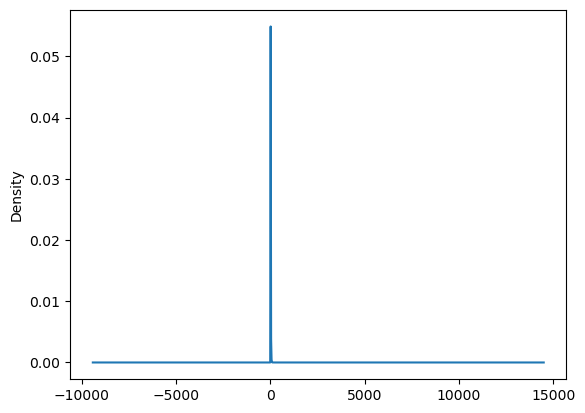

In [20]:
import plotly.figure_factory as ff
# fig = ff.create_distplot(['duration'], df[['duration']],curve_type='kde')
# fig.show()

df.duration.plot.kde()

In [21]:
# px.histogram(df.duration.head()) # wrong chart. I want top 5 or top 10 duration, need the counter package. shall continue later; further EDA for future weeks TODO

## Data preparation

### Dropping outliers

The duration column has outliers as shown by the `describe()` function.


Q3. What fraction of the records left after you dropped the outliers?

A3. 98%

In [22]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [23]:
df.shape

(2421440, 20)

<Axes: ylabel='Density'>

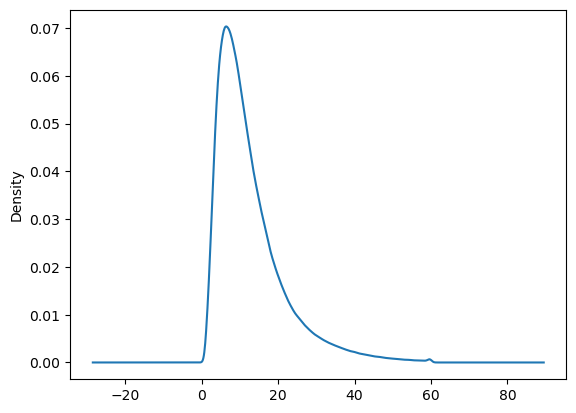

In [24]:
df.duration.plot.kde()

In [25]:
len(df) / orig_len

0.9827547930522406

### Verify outliers dropped

Not just from shape attributes, but values as well

In [26]:
# df.duration.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99])
df.duration.describe()

count    2.421440e+06
mean     1.267128e+01
std      8.999282e+00
min      1.000000e+00
25%      6.433333e+00
50%      1.023333e+01
75%      1.613333e+01
max      6.000000e+01
Name: duration, dtype: float64

### One-hot encoding

Q4. What's the dimensionality of this matrix (number of columns) for pickup and dropoff location IDs?

A4. 515

In [27]:
expected = 0
categorical = ['PULocationID', 'DOLocationID']

for location in categorical:
    print(location)
    nuniques = df[location].nunique()
    print(f"No of unique values in {location}: {nuniques}")
    expected += nuniques
    # print(df[location].value_counts())
    print()

print(f"expected new no of columns: {expected}")

PULocationID
No of unique values in PULocationID: 254

DOLocationID
No of unique values in DOLocationID: 261

expected new no of columns: 515


In [28]:
# populate isna with -1 and convert into integer datatype
df[categorical] = df[categorical].fillna(-1).astype('int')

In [29]:
df[categorical] = df[categorical].astype('str')

In [30]:
train_dicts = df[categorical].to_dict(orient='records')

In [31]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts) 

In [32]:
X_train.shape

(2421440, 515)

In [33]:
assert expected == X_train.shape[1]

### Training a model

Q5. What's the RMSE on train?

A5. 6.99

In [34]:
y_train = df.duration.values

In [35]:
len(dv.feature_names_)

515

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_train)

In [38]:
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE on train: {rmse:.2f}")

RMSE on train: 6.99


### Evaluating the model

Q6. What's the RMSE on validation?

A6. 7.79

In [39]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [40]:
# use our function that loads and cleans the data following the train pipeline steps
df_val = read_data('../data/raw/yellow_tripdata_2022-02.parquet')

In [41]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [42]:
X_val = dv.transform(val_dicts) 

In [43]:
y_pred = lr.predict(X_val)

In [44]:
y_val = df_val.duration.values

In [45]:
rmse_val = mean_squared_error(y_val, y_pred, squared=False)
print(f"RMSE on val: {rmse_val:.2f}")

RMSE on val: 7.79
